In [76]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
#set # if nax rows and columns to show
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [78]:
#reading csv file from link
df=pd.read_csv('https://docs.google.com/spreadsheets/d/1_ODNIn5n1k9RSVr_7gV2On4idZ6v0B2XPeMhCD18kio/pub?gid=1188863554&single=true&output=csv')
#df.head()

In [79]:
chiefs = df['chief'].unique()


In [80]:
x = 0
for chief in chiefs:
    print(chief)
    df.loc[df['chief'] == chief, 'chief_term'] = x
    #dfcoyp['chief_term'] = x
    x = x + 1

Vinson
Warren
Burger
Rehnquist
Roberts


partywinning
is disposition direction
Declaration uncon
case disposition
Vote unclear
isdecisiondirection
issuearea
decisiondirectiondissent
lawsupp
case source

In [81]:
X=df[[#"term",
#"petitioner",
#"respondent",
#"adminAction",
#"caseOrigin",
#"caseSource",
#"lcDisagreement",
#"lcDispositionDirection",
#"declarationUncon",
#"caseDispositionUnusual",
#"caseDisposition",
#"precedentAlteration",
#"voteUnclear",
#"issue",
#"issueArea",
#"decisionDirection",
#"decisionDirectionDissent",
#"authorityDecision1",
#"lawSupp",
#"majOpinWriter",
#"majOpinAssigner",
"decisionDirection",
#"decisionType",
"threeJudgeFdc",
"certReason",
"lcDisposition",
"partyWinning",
"majVotes",
"chief_term",
"minVotes",
"caseDisposition"
]]

In [82]:
y=df[["decisionType"]]

In [83]:
#X = df.drop(columns=y)

In [84]:
y.isna().sum()

decisionType    0
dtype: int64

In [85]:
#y_reshaped = y.reshape(-1, 1)

In [86]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='constant', fill_value=0)
#caseDisposition = df[['caseDisposition']]
y_imputed = pd.DataFrame(imputer.fit_transform(y))
print(y_imputed)

       0
0      1
1      1
2      1
3      1
4      1
...   ..
13849  1
13850  1
13851  1
13852  2
13853  1

[13854 rows x 1 columns]


In [87]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
print(X_imputed)

       decisionDirection  threeJudgeFdc  certReason  lcDisposition  \
0                    2.0            0.0        11.0            2.0   
1                    1.0            0.0         4.0            2.0   
2                    1.0            0.0         4.0            2.0   
3                    1.0            0.0         4.0            2.0   
4                    1.0            0.0         4.0            2.0   
...                  ...            ...         ...            ...   
13849                2.0            0.0         2.0            3.0   
13850                2.0            0.0         2.0            3.0   
13851                1.0            0.0        12.0            2.0   
13852                1.0            0.0        12.0            2.0   
13853                1.0            0.0        12.0            2.0   

       partyWinning  majVotes  chief_term  minVotes  caseDisposition  
0               1.0       8.0         0.0       1.0              3.0  
1               0

In [88]:
X_imputed

,decisionDirection,threeJudgeFdc,certReason,lcDisposition,partyWinning,majVotes,chief_term,minVotes,caseDisposition
0,2.0,0.0,11.0,2.0,1.0,8.0,0.0,1.0,3.0
1,1.0,0.0,4.0,2.0,0.0,6.0,0.0,3.0,2.0
2,1.0,0.0,4.0,2.0,0.0,6.0,0.0,3.0,2.0
3,1.0,0.0,4.0,2.0,0.0,6.0,0.0,3.0,2.0
4,1.0,0.0,4.0,2.0,0.0,6.0,0.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...
13849,2.0,0.0,2.0,3.0,0.0,6.0,4.0,3.0,2.0
13850,2.0,0.0,2.0,3.0,0.0,6.0,4.0,3.0,2.0
13851,1.0,0.0,12.0,2.0,1.0,9.0,4.0,0.0,3.0
13852,1.0,0.0,12.0,2.0,1.0,9.0,4.0,0.0,4.0


Remove any columns that are not useful
use PCA model - compressing the data


<Axes: xlabel='chief'>

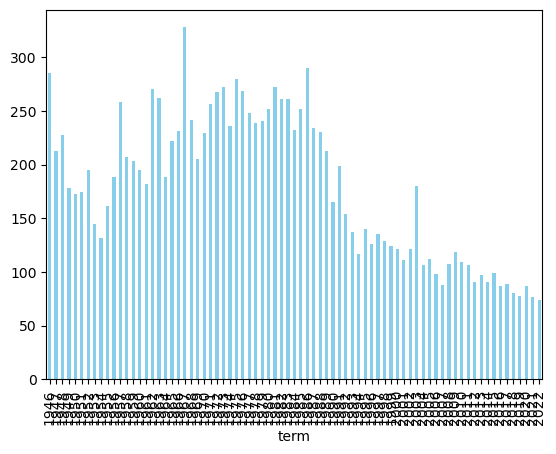

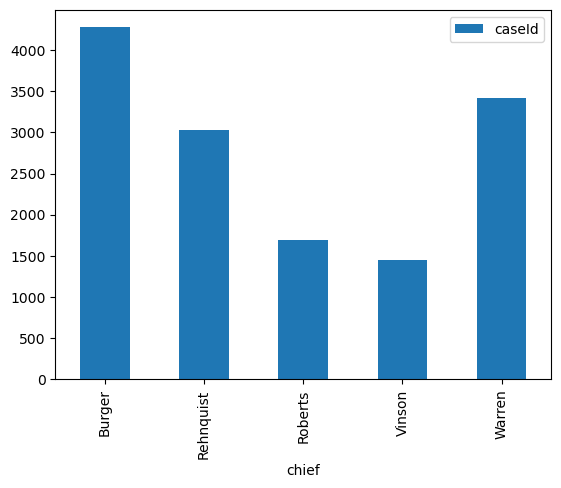

In [89]:
# added by dipesh
path = "https://docs.google.com/spreadsheets/d/1_ODNIn5n1k9RSVr_7gV2On4idZ6v0B2XPeMhCD18kio/pub?gid=1188863554&single=true&output=csv"
df = pd.read_csv(path)
df1 = pd.DataFrame(df)
df1.head()
df1 = df1.set_index('voteId')
df1['term'].value_counts().sort_index().plot(kind='bar', color='skyblue')
df2 = df1[['chief','caseId']]
df2 = df2.sort_values(by='caseId',ascending=True)

df2['chief'].value_counts()
df2.pivot_table(index='chief',values='caseId',aggfunc='count').plot(kind='bar')

In [90]:
#creating instance of OneHotEncoder to convert objects to integers
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')

In [91]:
y_reshaped= y_imputed.values.reshape(-1,1)

In [92]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')
ohe_X_imputed = ohe.fit_transform(X_imputed)

#X_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
ohe_X_imputed

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [93]:
len(X_imputed)

13854

In [94]:
# Split the data into training and testing sets using random_state=1
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, random_state=42)

In [95]:
# Create the KNN model with 9 neighbors
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model to the training data
knn.fit(X_train, y_train)

c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [96]:
#using score function to find training and testing score
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print(f"Train/Test Score: {train_score:.3f}/{test_score:.3f}")

Train/Test Score: 0.860/0.850


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 1, Train/Test Score: 0.888/0.810


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 11, Train/Test Score: 0.855/0.844


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 21, Train/Test Score: 0.848/0.841


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 31, Train/Test Score: 0.847/0.840


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 41, Train/Test Score: 0.845/0.839


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 51, Train/Test Score: 0.844/0.838


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 61, Train/Test Score: 0.840/0.838


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 71, Train/Test Score: 0.840/0.838


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 81, Train/Test Score: 0.836/0.834


c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 91, Train/Test Score: 0.836/0.832


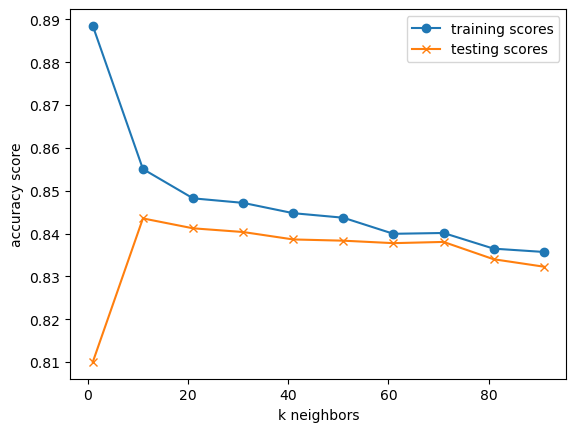

In [97]:
#importing matplotlib for creating graphs
import matplotlib.pyplot as plt
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = [] # training_scores list to store results
test_scores = [] # testing_scores list to store results

#looping through the k in range of 1 to 30 in increments of 3
for k in range(1, 101, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 101, 10), train_scores, marker='o', label="training scores")
plt.plot(range(1, 101, 10), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [98]:
# Import the PCA module
from sklearn.decomposition import PCA

In [99]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=2)

In [100]:
# Fit the PCA model on the transformed credit card DataFrame
X_imputed_transformed = pca.fit_transform(X_imputed)

# Review the first 5 rows of list data
X_imputed_transformed

array([[-3.50755118, -0.19708411],
       [ 3.47563455, -2.1801595 ],
       [ 3.47563455, -2.1801595 ],
       ...,
       [-4.52279886,  0.81473124],
       [-4.55339087,  0.99313529],
       [-4.54232774, -0.15782591]])

In [101]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.62958966, 0.12974697])

In [102]:
# Create the PCA DataFrame
ccinfo_pca_df = pd.DataFrame(
    X_imputed_transformed,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
ccinfo_pca_df.head(20)

,PCA1,PCA2
0,-3.507551,-0.197084
1,3.475635,-2.180159
2,3.475635,-2.180159
3,3.475635,-2.180159
4,3.475635,-2.180159
5,3.475635,-2.180159
6,3.475635,-2.180159
7,3.475635,-2.180159
8,3.475635,-2.180159
9,6.478121,-3.053793


In [103]:
from sklearn.cluster import KMeans

In [104]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=42)
    k_model.fit(X_imputed_transformed)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,403818.740698
1,2,80918.490193
2,3,65181.049991
3,4,37393.043122
4,5,31686.097776


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

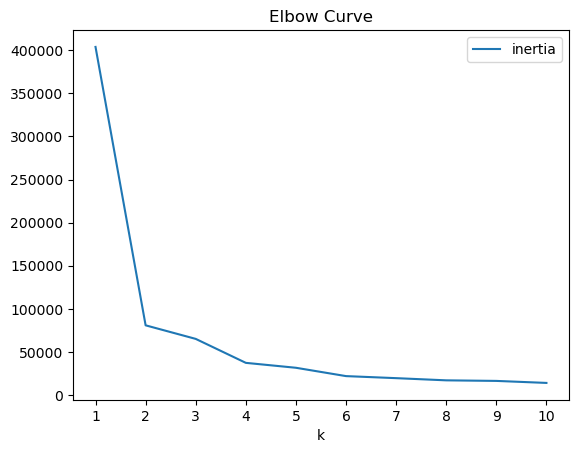

In [105]:
# Plot the Elbow Curve
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [106]:
# Determine the rate of decrease between each k value
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 79.96%
Percentage decrease from k=2 to k=3: 19.45%
Percentage decrease from k=3 to k=4: 42.63%
Percentage decrease from k=4 to k=5: 15.26%
Percentage decrease from k=5 to k=6: 30.52%
Percentage decrease from k=6 to k=7: 10.77%
Percentage decrease from k=7 to k=8: 12.90%
Percentage decrease from k=8 to k=9: 3.84%
Percentage decrease from k=9 to k=10: 14.21%


In [107]:
# Define the model with 3 clusters
model = KMeans(n_clusters=5, n_init='auto', random_state=1)

# Fit the model
model.fit(ccinfo_pca_df)

# Make predictions
k_5 = model.predict(ccinfo_pca_df)

# Create a copy of the PCA DataFrame
ccinfo_pca_predictions_df = ccinfo_pca_df.copy()

# Add a class column with the labels
ccinfo_pca_predictions_df["customer_segments"] = k_5

<Axes: xlabel='PCA1', ylabel='PCA2'>

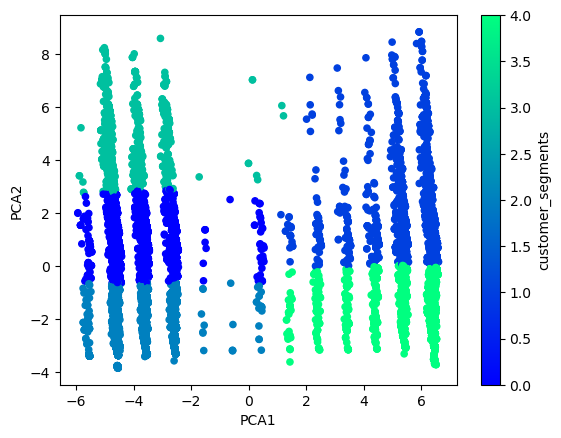

In [108]:
# Plot the clusters
ccinfo_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="customer_segments",
    colormap='winter')

In [109]:
# What columns contribute the most to the explained variance?
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.62958966, 0.12974697])

In [110]:
# Determine which feature has the stronger influence on each principal component. 
# Use the columns from the original DataFrame. FYI: The data has already been scaled and fitted.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=X.columns)
pca_component_weights

,PCA1,PCA2
decisionDirection,0.004636,0.018196
threeJudgeFdc,0.023015,-0.000671
certReason,-0.998122,-0.027133
lcDisposition,-0.043779,0.701953
partyWinning,-0.009435,0.031291
majVotes,0.011420,0.488023
chief_term,-0.008005,0.021147
minVotes,-0.008108,-0.484534
caseDisposition,-0.030592,0.178404


In [111]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
lr_model.fit(X_train, y_train)

c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [112]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.8303176130895091
Testing Data Score: 0.832852193995381


In [113]:
lr_predictions = lr_model.predict(X_test)
# Calculate the accuracy score
acc_score = accuracy_score(y_test, lr_predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.832852193995381


In [114]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=128, random_state=42)

In [115]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {rf_model.score(X_train, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test, y_test)}")

Training Data Score: 0.9205967276227142
Testing Data Score: 0.859122401847575


In [116]:
rf_predictions = rf_model.predict(X_test)
# Calculate the accuracy score
acc_score = accuracy_score(y_test, rf_predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.859122401847575


In [117]:
from sklearn import tree

In [118]:
dt_model = tree.DecisionTreeClassifier()

In [119]:
d_model = dt_model.fit(X_train, y_train)

In [120]:
# Making predictions using the testing data
dt_predictions = d_model.predict(X_test)
acc_score = accuracy_score(y_test, dt_predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.8435334872979214


In [121]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, dt_predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.8435334872979214


In [122]:
!pip install pydotplus

In [123]:
import pydotplus
from IPython.display import Image

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.236239 to fit



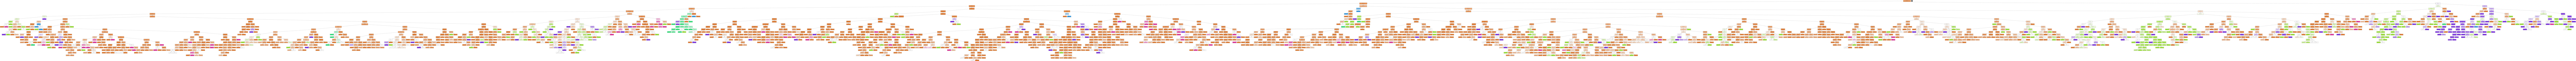

In [124]:
#Create DOT data
dot_data = tree.export_graphviz(
    d_model, out_file=None, feature_names=X_imputed.columns, filled=True, max_depth=30
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

